<a href="https://colab.research.google.com/github/PashaIanko/Pandas-Micro-Learning-Course/blob/main/importance_of_feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import & install packages

In [1]:
!pip install palmerpenguins

In [3]:
import pandas as pd
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Prepare the `penguins` dataset

In [38]:
def prepare_data():
    dataset = load_penguins()
    dataset.dropna(inplace=True)
    X = dataset[
        [
            'bill_length_mm',
            'bill_depth_mm',
            'flipper_length_mm',
            'body_mass_g',
            'year'
        ]
    ]
    y = dataset[['sex']]
    return X, y

X, y = prepare_data()
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,39.1,18.7,181.0,3750.0,2007
1,39.5,17.4,186.0,3800.0,2007
2,40.3,18.0,195.0,3250.0,2007
4,36.7,19.3,193.0,3450.0,2007
5,39.3,20.6,190.0,3650.0,2007


# Visualize data

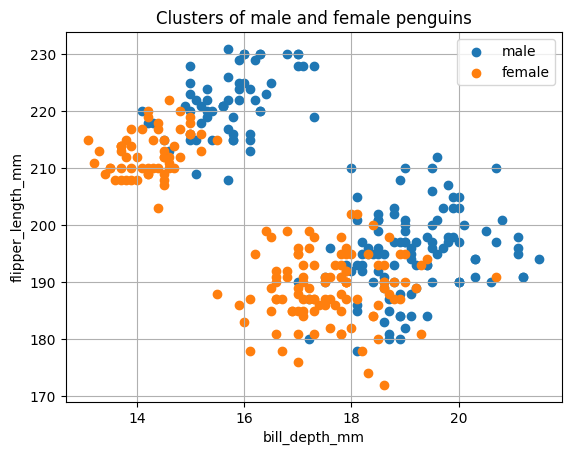

In [39]:
def visualize_data(X, y, features=['body_mass_g', 'flipper_length_mm']):
    _, ax = plt.subplots()
    ax.scatter(
        X.loc[y['sex']=='male', features[0]],
        X.loc[y['sex']=='male', features[1]],
        label='male'
    )
    ax.scatter(
        X.loc[y['sex']=='female', features[0]],
        X.loc[y['sex']=='female', features[1]],
        label='female'
    )
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_title(f'Clusters of male and female penguins')
    ax.legend()
    ax.grid()

visualize_data(X, y, features=['bill_depth_mm', 'flipper_length_mm'])

# Split the data

In [27]:
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42,
    stratify=y
)

X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

((266, 5), (67, 5), (266, 1), (67, 1))

# Train and evaluate KNN on **unscaled** data

In [30]:
knn_unscaled = KNeighborsClassifier()
knn_unscaled.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier()

In [40]:
def report_model_performance(model, X, y):
    return round(accuracy_score(model.predict(X), y), 2)

print(f'Train accuracy: {report_model_performance(knn_unscaled, X_train, Y_train)}')
print(f'Validation accuracy: {report_model_performance(knn_unscaled, X_validation, Y_validation)}')

Train accuracy: 0.84
Validation accuracy: 0.81


# Train and evaluate KNN on **scaled** data

In [35]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [36]:
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, Y_train.values.ravel())

KNeighborsClassifier()

In [41]:
print(f'Train accuracy: {report_model_performance(knn_scaled, X_train_scaled, Y_train)}')
print(f'Validation accuracy: {report_model_performance(knn_scaled, X_validation_scaled, Y_validation)}')

Train accuracy: 0.94
Validation accuracy: 0.87


# Compare results

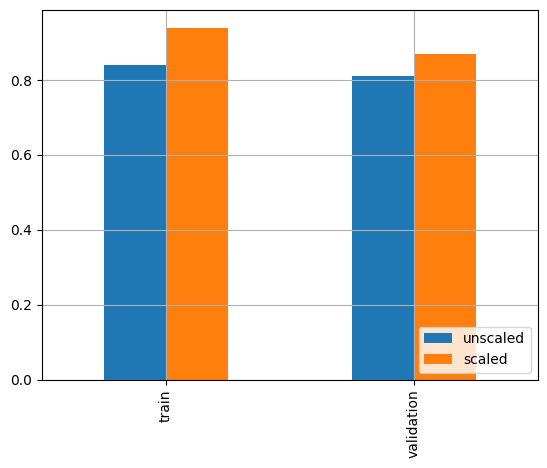

In [59]:
_, ax = plt.subplots()

results = pd.DataFrame(
    {
        'unscaled': {
            'train': 0.84,
            'validation': 0.81
        },
        'scaled': {
            'train': 0.94,
            'validation': 0.87
        }
    }
)
results.plot(kind='bar', ax=ax).grid()
ax.legend(loc='lower right')